In [1]:
import itertools
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

## Example. Checking the assumption of independence in binomial trials

Consider a sequence of binary outcomes, $y_1,\ldots,y_n$, modeled as a specified number of independent trials with a common probability of success, $\theta$.

In [2]:
Trials = np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
with pm.Model() as ModelIndepBinom:    
    theta = pm.Uniform('theta', lower=0, upper=1)
    obs   = pm.Binomial('obs', n=len(Trials), p=theta, observed=Trials.sum())

In [4]:
with ModelIndepBinom:
    TraceIndepBinom = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [5]:
ThetaPosterior = TraceIndepBinom.posterior.theta.values.ravel()

---

In [6]:
def n_switches(ll):
    """
    Function that takes a list of ones and zeros and returns the number of switches between 0 and 1 in the sequence.
    """
    return len(list(itertools.groupby(ll, lambda x: x == 0))) - 1

For each value of $\theta$ we simulate 20 new trials, and count the number of changes

In [7]:
chang_li = []

for i in range(len(ThetaPosterior)):
    ll = np.random.binomial(n=1, p=ThetaPosterior[i], size=20)
    chang_li.append(n_switches(ll))

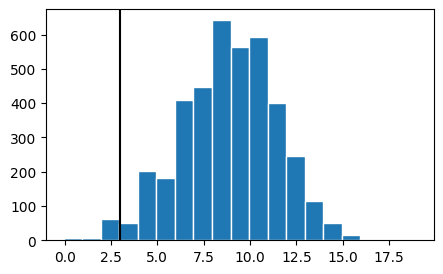

In [8]:
plt.figure(figsize=(5, 3))
_ = plt.hist(chang_li, bins=np.arange(-0.05,19.5,1), edgecolor='w')
plt.axvline(n_switches(Trials), color='k')

In [9]:
#p_value
np.mean(np.array(chang_li) >= n_switches(Trials))

0.9805

The observed number of switches is far less that what we would expect, and the discrepancy cannot be explained by chance.